In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
# Loading data
SC = pd.read_csv('C:/Users/User/Desktop/seungchon_2016-2023.csv', encoding='cp949')
JS = pd.read_csv('C:/Users/User/Desktop/juksan_2016-2023.csv', encoding='cp949')

In [97]:
def my_level(x) :
    if x <= 2 :
        return "Very good"
    elif 2 < x <= 3 :
        return "Good"
    elif 3 < x <= 4 :
        return "Slightly good"
    elif 4 < x <= 5 :
        return "Normal"
    elif 5 < x <= 6 :
        return "Slightly bad"
    elif 6 < x <= 8 :
        return "Bad"
    else :
        return "Very bad"

In [98]:
SC["level"] = SC["TOC"].apply(lambda x : my_level(x))
JS["level"] = JS["TOC"].apply(lambda x : my_level(x))

In [99]:
SC.head()

,Year,Month,Date,Spot,Time,BOD,COD,TN,TP,TOC,...,DO,EC,Chla,WT,WL,WS,RF,TI,TD,level
0,2016,1,2016.01.04,광산,0,2.3,4.9,5.535,0.081,4.5,...,11.8,406,16.9,7.7,7.51,8.990,0.0000,14.850,15.070,Normal
1,2016,1,2016.01.11,광산,7,2.9,5.5,6.618,0.161,5.1,...,12.7,416,36.9,7.5,7.50,8.971,0.0000,14.735,15.174,Slightly bad
2,2016,1,2016.01.18,광산,14,2.9,6.0,7.880,0.140,5.8,...,13.6,462,38.9,7.0,7.51,8.990,3.7453,15.356,15.136,Slightly bad
3,2016,1,2016.01.28,광산,24,2.4,5.0,7.099,0.114,5.7,...,13.1,385,21.2,4.2,7.62,9.216,7.3612,19.858,17.458,Slightly bad
4,2016,2,2016.02.02,광산,29,4.2,6.5,4.747,0.232,5.6,...,11.3,371,13.3,4.2,7.55,9.066,0.0000,22.615,23.610,Slightly bad


In [100]:
JS.head()

,Year,Month,Data,Spot,Time,BOD,COD,TN,TP,TOC,...,DO,EC,Chla,WT,WL,WS,RF,TI,TD,level
0,2016,1,2016.01.04,죽산,0,4.1,6.1,4.476,0.092,4.7,...,15.6,348,86.9,6.8,3.51,25.750,0.0000,23.338,23.338,Normal
1,2016,1,2016.01.11,죽산,7,3.6,6.4,4.520,0.092,6.1,...,14.2,345,114.7,5.8,3.48,25.575,0.0000,20.703,23.488,Bad
2,2016,1,2016.01.18,죽산,14,4.1,7.1,5.105,0.075,6.8,...,17.0,379,112.9,5.3,3.53,25.882,3.8457,22.312,20.022,Bad
3,2016,1,2016.01.28,죽산,24,4.9,8.2,5.698,0.113,7.7,...,15.8,376,116.6,3.2,3.54,25.948,9.4872,29.833,25.522,Bad
4,2016,2,2016.02.02,죽산,29,2.9,5.9,5.458,0.146,5.3,...,14.1,408,32.6,3.4,3.53,25.882,0.0000,41.374,45.953,Slightly bad


In [101]:
SC_train = SC.loc[SC['Year']!=2023]
SC_test = SC.loc[SC['Year']==2023]
SC_train_variables = SC_train.iloc[:,5:25].drop(labels="level", axis=1)
SC_train_level = SC_train.iloc[:,5:25].iloc[:,-1]
SC_test_variables = SC_test.iloc[:,5:25].drop(labels="level", axis=1)
SC_test_level = SC_test.iloc[:,5:25].iloc[:,-1]

In [102]:
JS_train = JS.loc[JS['Year']!=2023]
JS_test = JS.loc[JS['Year']==2023]
JS_train_variables = JS_train.iloc[:,5:25].drop(labels="level", axis=1)
JS_train_level = JS_train.iloc[:,5:25].iloc[:,-1]
JS_test_variables = JS_test.iloc[:,5:25].drop(labels="level", axis=1)
JS_test_level = JS_test.iloc[:,5:25].iloc[:,-1]

In [103]:
### Sampling for imbalanced data
!pip install -U imbalanced-learn

In [104]:
from sklearn.datasets import make_classification
from collections import Counter

In [105]:
from matplotlib import pyplot as plt
import seaborn as sns

In [106]:
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours 
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

In [107]:
import scipy as sc
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from imblearn.under_sampling import *

n0 = 200; n1 = 20
rv1 = sc.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
rv2 = sc.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

x1min = -4; x1max = 4
x2min = -2; x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

def classification_result2(X, y, title=""):
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="class 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="class 1")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    return model

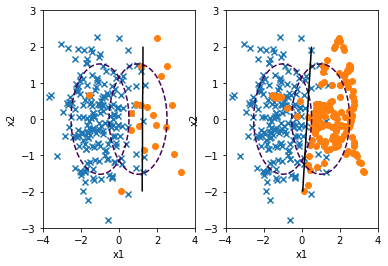

In [108]:
# SMOTE
X_samp, y_samp = SMOTE(random_state=5790).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.savefig('SMOTE.png')

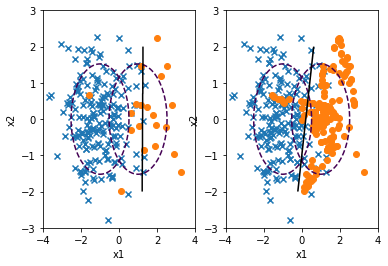

In [109]:
# ADASYN
X_samp, y_samp = ADASYN(random_state=5790).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.savefig('ADASYN.png')

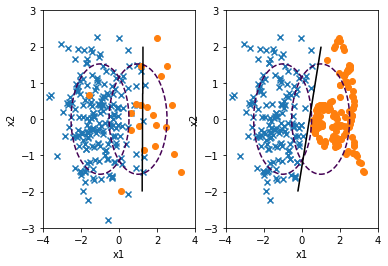

In [110]:
# SMOTE-ENN
X_samp, y_samp = SMOTEENN(random_state=5790).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.savefig('SMOTE-ENN.png')

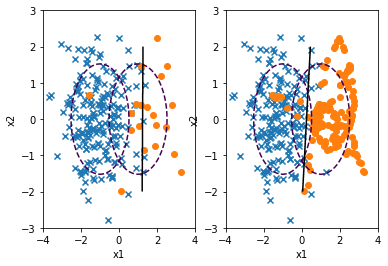

In [111]:
# SMOTE-Tomek
X_samp, y_samp = SMOTETomek(random_state=5790).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.savefig('SMOTE-Tomek.png')

In [112]:
### Making training data with sampling techniques for imbalanced data

In [113]:
## Seungchon
Counter(SC_train_level)

Counter({'Normal': 36,
         'Slightly bad': 74,
         'Bad': 131,
         'Very bad': 104,
         'Slightly good': 8})

In [114]:
SC_train_x = SC_train_variables.drop(labels="Chla", axis=1)
SC_train_y = SC_train_variables.iloc[:,-7]
SC_test_x = SC_test_variables.drop(labels="Chla", axis=1)
SC_test_y = SC_test_variables.iloc[:,-7]

In [115]:
# SMOTE
sm_sample = SMOTE(random_state=5790) 
SC_train_variables_sm, SC_train_level_sm = sm_sample.fit_resample(SC_train_variables, SC_train_level)

In [116]:
Counter(SC_train_level_sm)

Counter({'Normal': 131,
         'Slightly bad': 131,
         'Bad': 131,
         'Very bad': 131,
         'Slightly good': 131})

In [117]:
SC_train_x_sm = SC_train_variables_sm.drop(labels="Chla", axis=1)
SC_train_y_sm = SC_train_variables_sm.iloc[:,-7]

In [118]:
# SMOTE-ENN
sme_sample = SMOTEENN(random_state=5790) 
SC_train_variables_sme, SC_train_level_sme = sme_sample.fit_resample(SC_train_variables, SC_train_level)

In [119]:
Counter(SC_train_level_sme)

Counter({'Bad': 3,
         'Normal': 55,
         'Slightly bad': 43,
         'Slightly good': 96,
         'Very bad': 25})

In [120]:
SC_train_x_sme = SC_train_variables_sme.drop(labels="Chla", axis=1)
SC_train_y_sme = SC_train_variables_sme.iloc[:,-7]

In [121]:
# SMOTE-Tomek
smt_sample = SMOTETomek(random_state=5790) 
SC_train_variables_smt, SC_train_level_smt = smt_sample.fit_resample(SC_train_variables, SC_train_level)

In [122]:
Counter(SC_train_level_smt)

Counter({'Slightly bad': 113,
         'Bad': 112,
         'Normal': 117,
         'Very bad': 121,
         'Slightly good': 124})

In [123]:
SC_train_x_smt = SC_train_variables_smt.drop(labels="Chla", axis=1)
SC_train_y_smt = SC_train_variables_smt.iloc[:,-7]

In [124]:
## Juksan
Counter(JS_train_level)

Counter({'Normal': 53,
         'Bad': 152,
         'Slightly bad': 73,
         'Slightly good': 10,
         'Very bad': 66})

In [125]:
JS_train_x = JS_train_variables.drop(labels="Chla", axis=1)
JS_train_y = JS_train_variables.iloc[:,-7]
JS_test_x = JS_test_variables.drop(labels="Chla", axis=1)
JS_test_y = JS_test_variables.iloc[:,-7]

In [126]:
# SMOTE
sm_sample = SMOTE(random_state=5790) 
JS_train_variables_sm, JS_train_level_sm = sm_sample.fit_resample(JS_train_variables, JS_train_level)

In [127]:
Counter(JS_train_level_sm)

Counter({'Normal': 152,
         'Bad': 152,
         'Slightly bad': 152,
         'Slightly good': 152,
         'Very bad': 152})

In [128]:
JS_train_x_sm = JS_train_variables_sm.drop(labels="Chla", axis=1)
JS_train_y_sm = JS_train_variables_sm.iloc[:,-7]

In [129]:
# SMOTE-ENN
sme_sample = SMOTEENN(random_state=5790) 
JS_train_variables_sme, JS_train_level_sme = sme_sample.fit_resample(JS_train_variables, JS_train_level)

In [130]:
Counter(JS_train_level_sme)

Counter({'Bad': 14,
         'Normal': 69,
         'Slightly bad': 42,
         'Slightly good': 119,
         'Very bad': 81})

In [131]:
JS_train_x_sme = JS_train_variables_sme.drop(labels="Chla", axis=1)
JS_train_y_sme = JS_train_variables_sme.iloc[:,-7]

In [132]:
# SMOTE-Tomek
smt_sample = SMOTETomek(random_state=5790) 
JS_train_variables_smt, JS_train_level_smt = smt_sample.fit_resample(JS_train_variables, JS_train_level)

In [133]:
Counter(JS_train_level_smt)

Counter({'Normal': 145,
         'Bad': 133,
         'Slightly bad': 136,
         'Slightly good': 147,
         'Very bad': 145})

In [134]:
JS_train_x_smt = JS_train_variables_smt.drop(labels="Chla", axis=1)
JS_train_y_smt = JS_train_variables_smt.iloc[:,-7]

In [135]:
### DNN, CNN
# Install tensorflow first! (important!!)
!pip install tensorflow 

In [136]:
!pip install Keras

In [137]:
import tensorflow as tf

In [138]:
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #표준 정규화, 최대-최소 정규화
from keras.layers import Dropout

In [158]:
## DNN model (SC)
# model
model = tf.keras.Sequential()  
model.add(layers.Dense(64, input_shape=(18,)))  
model.add(layers.Activation('relu'))  
model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1))
model.add(layers.Activation('linear')) 

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함. 

In [159]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1216      
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 activation_5 (Activation)   (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 activation_6 (Activation)   (None, 16)                0         
                                                                 
 dropout_1 (Dropout)         (None, 16)               

In [160]:
# Original
hist = model.fit(
    SC_train_x, SC_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
9/9 - 0s - loss: 5023.4336 - mean_squared_error: 5023.4336 - mean_absolute_error: 57.6988 - val_loss: 4475.5278 - val_mean_squared_error: 4475.5278 - val_mean_absolute_error: 55.9603 - 408ms/epoch - 45ms/step
Epoch 2/100
9/9 - 0s - loss: 4205.4370 - mean_squared_error: 4205.4370 - mean_absolute_error: 51.1344 - val_loss: 3971.0193 - val_mean_squared_error: 3971.0193 - val_mean_absolute_error: 51.4005 - 27ms/epoch - 3ms/step
Epoch 3/100
9/9 - 0s - loss: 3767.3022 - mean_squared_error: 3767.3022 - mean_absolute_error: 47.0779 - val_loss: 3456.2600 - val_mean_squared_error: 3456.2600 - val_mean_absolute_error: 46.4758 - 27ms/epoch - 3ms/step
Epoch 4/100
9/9 - 0s - loss: 3251.0725 - mean_squared_error: 3251.0725 - mean_absolute_error: 42.0190 - val_loss: 2928.9993 - val_mean_squared_error: 2928.9993 - val_mean_absolute_error: 41.4964 - 23ms/epoch - 3ms/step
Epoch 5/100
9/9 - 0s - loss: 2943.2515 - mean_squared_error: 2943.2515 - mean_absolute_error: 38.8196 - val_loss: 2402.963

Epoch 39/100
9/9 - 0s - loss: 1517.1790 - mean_squared_error: 1517.1790 - mean_absolute_error: 27.8720 - val_loss: 1145.1022 - val_mean_squared_error: 1145.1022 - val_mean_absolute_error: 25.1659 - 21ms/epoch - 2ms/step
Epoch 40/100
9/9 - 0s - loss: 1523.1936 - mean_squared_error: 1523.1935 - mean_absolute_error: 27.7524 - val_loss: 1152.9854 - val_mean_squared_error: 1152.9854 - val_mean_absolute_error: 24.9876 - 22ms/epoch - 2ms/step
Epoch 41/100
9/9 - 0s - loss: 1506.1387 - mean_squared_error: 1506.1385 - mean_absolute_error: 26.7435 - val_loss: 1112.5759 - val_mean_squared_error: 1112.5759 - val_mean_absolute_error: 24.7530 - 20ms/epoch - 2ms/step
Epoch 42/100
9/9 - 0s - loss: 1485.1147 - mean_squared_error: 1485.1147 - mean_absolute_error: 25.7449 - val_loss: 1102.4594 - val_mean_squared_error: 1102.4594 - val_mean_absolute_error: 24.6817 - 20ms/epoch - 2ms/step
Epoch 43/100
9/9 - 0s - loss: 1371.2332 - mean_squared_error: 1371.2332 - mean_absolute_error: 26.1058 - val_loss: 1072.

Epoch 77/100
9/9 - 0s - loss: 1063.0798 - mean_squared_error: 1063.0798 - mean_absolute_error: 22.9619 - val_loss: 723.2375 - val_mean_squared_error: 723.2375 - val_mean_absolute_error: 19.4100 - 21ms/epoch - 2ms/step
Epoch 78/100
9/9 - 0s - loss: 1085.2759 - mean_squared_error: 1085.2759 - mean_absolute_error: 23.3590 - val_loss: 719.5416 - val_mean_squared_error: 719.5416 - val_mean_absolute_error: 20.1557 - 21ms/epoch - 2ms/step
Epoch 79/100
9/9 - 0s - loss: 1090.4391 - mean_squared_error: 1090.4391 - mean_absolute_error: 23.2272 - val_loss: 738.4462 - val_mean_squared_error: 738.4462 - val_mean_absolute_error: 20.4947 - 22ms/epoch - 2ms/step
Epoch 80/100
9/9 - 0s - loss: 948.4346 - mean_squared_error: 948.4346 - mean_absolute_error: 23.6722 - val_loss: 704.8303 - val_mean_squared_error: 704.8303 - val_mean_absolute_error: 19.2037 - 21ms/epoch - 2ms/step
Epoch 81/100
9/9 - 0s - loss: 1065.4961 - mean_squared_error: 1065.4961 - mean_absolute_error: 23.7064 - val_loss: 724.6116 - val_

In [161]:
scores = model.evaluate(SC_test_x, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 470.9068 - mean_squared_error: 470.9068 - mean_absolute_error: 16.3351
test_loss:  470.90679931640625
test_mae:  470.90679931640625


In [162]:
SC_test_y_pred_DNN = model.predict(SC_test_x)
SC_test_y_pred_DNN

2/2 [==============================] - 0s 1000us/step


array([[46.97789  ],
       [70.429344 ],
       [48.268375 ],
       [51.212955 ],
       [76.36089  ],
       [58.472176 ],
       [59.153667 ],
       [63.638596 ],
       [39.089817 ],
       [63.5302   ],
       [59.338543 ],
       [82.351845 ],
       [23.344494 ],
       [87.32107  ],
       [62.947994 ],
       [11.0162735],
       [85.50259  ],
       [72.482285 ],
       [57.197926 ],
       [14.718314 ],
       [15.188425 ],
       [ 9.290286 ],
       [ 2.936048 ],
       [ 3.3198106],
       [84.37156  ],
       [23.925135 ],
       [75.361305 ],
       [53.484833 ],
       [ 8.401262 ],
       [26.963394 ],
       [75.24082  ],
       [ 8.351838 ],
       [13.999815 ],
       [45.16585  ],
       [72.63745  ],
       [79.335846 ],
       [83.99206  ],
       [87.27581  ],
       [39.89392  ],
       [77.09194  ],
       [32.34016  ],
       [59.644756 ]], dtype=float32)

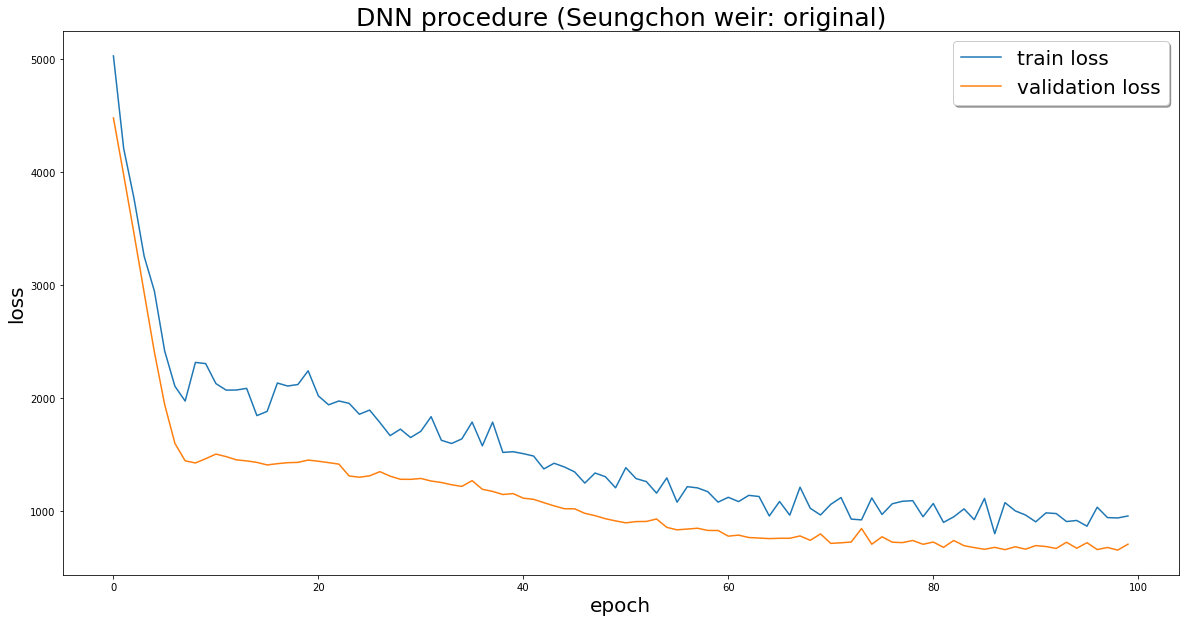

In [163]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Seungchon weir: original)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN SC_python.png')

In [164]:
# SMOTE
hist = model.fit(
    SC_train_x_sm, SC_train_y_sm,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
17/17 - 0s - loss: 822.7892 - mean_squared_error: 822.7892 - mean_absolute_error: 20.3820 - val_loss: 166.2373 - val_mean_squared_error: 166.2373 - val_mean_absolute_error: 9.3277 - 46ms/epoch - 3ms/step
Epoch 2/100
17/17 - 0s - loss: 969.5403 - mean_squared_error: 969.5403 - mean_absolute_error: 21.5200 - val_loss: 157.3154 - val_mean_squared_error: 157.3154 - val_mean_absolute_error: 8.9131 - 26ms/epoch - 2ms/step
Epoch 3/100
17/17 - 0s - loss: 841.7968 - mean_squared_error: 841.7968 - mean_absolute_error: 20.2846 - val_loss: 149.2272 - val_mean_squared_error: 149.2272 - val_mean_absolute_error: 8.5939 - 24ms/epoch - 1ms/step
Epoch 4/100
17/17 - 0s - loss: 775.8561 - mean_squared_error: 775.8561 - mean_absolute_error: 20.1460 - val_loss: 165.3144 - val_mean_squared_error: 165.3144 - val_mean_absolute_error: 9.3476 - 26ms/epoch - 2ms/step
Epoch 5/100
17/17 - 0s - loss: 707.9178 - mean_squared_error: 707.9178 - mean_absolute_error: 19.3412 - val_loss: 166.3374 - val_mean_sq

Epoch 39/100
17/17 - 0s - loss: 746.2789 - mean_squared_error: 746.2789 - mean_absolute_error: 19.1387 - val_loss: 166.9301 - val_mean_squared_error: 166.9301 - val_mean_absolute_error: 9.5310 - 28ms/epoch - 2ms/step
Epoch 40/100
17/17 - 0s - loss: 715.6487 - mean_squared_error: 715.6487 - mean_absolute_error: 18.4396 - val_loss: 166.1769 - val_mean_squared_error: 166.1769 - val_mean_absolute_error: 9.1792 - 25ms/epoch - 1ms/step
Epoch 41/100
17/17 - 0s - loss: 616.0655 - mean_squared_error: 616.0655 - mean_absolute_error: 17.7766 - val_loss: 156.2539 - val_mean_squared_error: 156.2539 - val_mean_absolute_error: 9.0457 - 24ms/epoch - 1ms/step
Epoch 42/100
17/17 - 0s - loss: 561.8408 - mean_squared_error: 561.8408 - mean_absolute_error: 16.5023 - val_loss: 167.5842 - val_mean_squared_error: 167.5842 - val_mean_absolute_error: 9.7094 - 25ms/epoch - 1ms/step
Epoch 43/100
17/17 - 0s - loss: 675.2415 - mean_squared_error: 675.2415 - mean_absolute_error: 18.4863 - val_loss: 163.3626 - val_me

Epoch 77/100
17/17 - 0s - loss: 688.4198 - mean_squared_error: 688.4198 - mean_absolute_error: 18.1979 - val_loss: 157.6319 - val_mean_squared_error: 157.6319 - val_mean_absolute_error: 9.3046 - 24ms/epoch - 1ms/step
Epoch 78/100
17/17 - 0s - loss: 765.6141 - mean_squared_error: 765.6141 - mean_absolute_error: 18.8145 - val_loss: 142.4375 - val_mean_squared_error: 142.4375 - val_mean_absolute_error: 8.7877 - 24ms/epoch - 1ms/step
Epoch 79/100
17/17 - 0s - loss: 667.2375 - mean_squared_error: 667.2375 - mean_absolute_error: 18.2319 - val_loss: 154.2454 - val_mean_squared_error: 154.2454 - val_mean_absolute_error: 8.9347 - 26ms/epoch - 2ms/step
Epoch 80/100
17/17 - 0s - loss: 727.2977 - mean_squared_error: 727.2977 - mean_absolute_error: 18.7237 - val_loss: 173.2567 - val_mean_squared_error: 173.2567 - val_mean_absolute_error: 9.3522 - 24ms/epoch - 1ms/step
Epoch 81/100
17/17 - 0s - loss: 706.8416 - mean_squared_error: 706.8416 - mean_absolute_error: 18.8013 - val_loss: 142.2746 - val_me

In [165]:
scores = model.evaluate(SC_test_x, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 507.8490 - mean_squared_error: 507.8490 - mean_absolute_error: 16.9631
test_loss:  507.8489685058594
test_mae:  507.8489685058594


In [166]:
SC_test_y_pred_DNN_sm = model.predict(SC_test_x)
SC_test_y_pred_DNN_sm

2/2 [==============================] - 0s 1ms/step


array([[50.75959  ],
       [66.66609  ],
       [58.660202 ],
       [58.986835 ],
       [78.158264 ],
       [62.278397 ],
       [64.91034  ],
       [65.89581  ],
       [36.11416  ],
       [60.98739  ],
       [59.587936 ],
       [78.59678  ],
       [33.218826 ],
       [88.80659  ],
       [53.076565 ],
       [11.465022 ],
       [95.565735 ],
       [58.292206 ],
       [45.74801  ],
       [24.125145 ],
       [18.896408 ],
       [ 6.9547048],
       [-2.9882169],
       [ 3.0093827],
       [95.56279  ],
       [44.795162 ],
       [86.27706  ],
       [47.481888 ],
       [ 9.757612 ],
       [38.592556 ],
       [69.72405  ],
       [ 5.3705254],
       [21.02476  ],
       [42.84581  ],
       [62.664417 ],
       [77.69888  ],
       [88.77373  ],
       [88.59108  ],
       [46.310844 ],
       [86.93181  ],
       [29.64948  ],
       [55.262016 ]], dtype=float32)

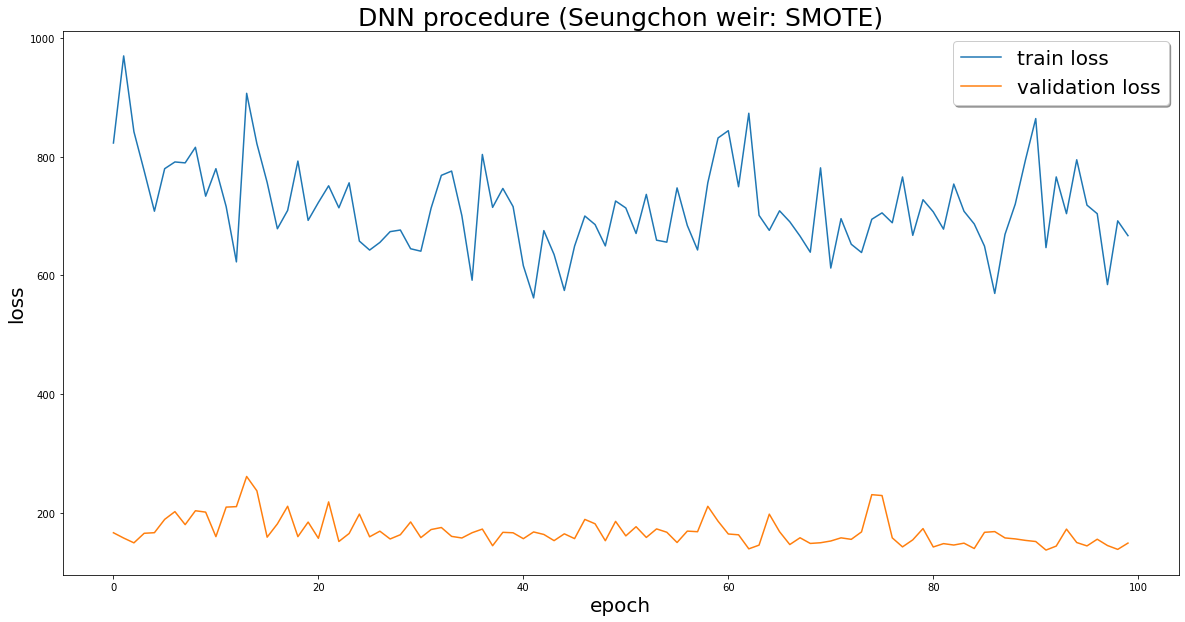

In [167]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Seungchon weir: SMOTE)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN SC_SMOTE_python.png')

In [168]:
# SMOTE-ENN
hist = model.fit(
    SC_train_x_sme, SC_train_y_sme,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
6/6 - 0s - loss: 286.4565 - mean_squared_error: 286.4565 - mean_absolute_error: 12.1036 - val_loss: 413.3311 - val_mean_squared_error: 413.3311 - val_mean_absolute_error: 15.8516 - 41ms/epoch - 7ms/step
Epoch 2/100
6/6 - 0s - loss: 477.2443 - mean_squared_error: 477.2443 - mean_absolute_error: 12.7508 - val_loss: 503.3368 - val_mean_squared_error: 503.3368 - val_mean_absolute_error: 16.3523 - 21ms/epoch - 4ms/step
Epoch 3/100
6/6 - 0s - loss: 303.0414 - mean_squared_error: 303.0414 - mean_absolute_error: 11.1894 - val_loss: 329.4155 - val_mean_squared_error: 329.4155 - val_mean_absolute_error: 13.7563 - 19ms/epoch - 3ms/step
Epoch 4/100
6/6 - 0s - loss: 417.7376 - mean_squared_error: 417.7376 - mean_absolute_error: 12.5754 - val_loss: 327.3470 - val_mean_squared_error: 327.3470 - val_mean_absolute_error: 13.7216 - 19ms/epoch - 3ms/step
Epoch 5/100
6/6 - 0s - loss: 292.7785 - mean_squared_error: 292.7785 - mean_absolute_error: 11.4256 - val_loss: 398.9659 - val_mean_squared_

6/6 - 0s - loss: 279.0286 - mean_squared_error: 279.0286 - mean_absolute_error: 11.0774 - val_loss: 352.3329 - val_mean_squared_error: 352.3329 - val_mean_absolute_error: 13.8954 - 20ms/epoch - 3ms/step
Epoch 40/100
6/6 - 0s - loss: 216.0466 - mean_squared_error: 216.0466 - mean_absolute_error: 9.7001 - val_loss: 377.1512 - val_mean_squared_error: 377.1512 - val_mean_absolute_error: 14.0107 - 19ms/epoch - 3ms/step
Epoch 41/100
6/6 - 0s - loss: 351.8971 - mean_squared_error: 351.8971 - mean_absolute_error: 11.2482 - val_loss: 351.8251 - val_mean_squared_error: 351.8251 - val_mean_absolute_error: 13.6855 - 21ms/epoch - 4ms/step
Epoch 42/100
6/6 - 0s - loss: 216.7696 - mean_squared_error: 216.7696 - mean_absolute_error: 9.8979 - val_loss: 303.4076 - val_mean_squared_error: 303.4076 - val_mean_absolute_error: 13.1471 - 19ms/epoch - 3ms/step
Epoch 43/100
6/6 - 0s - loss: 267.0722 - mean_squared_error: 267.0722 - mean_absolute_error: 11.1647 - val_loss: 370.0545 - val_mean_squared_error: 370

6/6 - 0s - loss: 258.0005 - mean_squared_error: 258.0005 - mean_absolute_error: 10.8931 - val_loss: 508.0710 - val_mean_squared_error: 508.0710 - val_mean_absolute_error: 15.1921 - 19ms/epoch - 3ms/step
Epoch 78/100
6/6 - 0s - loss: 222.0236 - mean_squared_error: 222.0236 - mean_absolute_error: 10.0852 - val_loss: 362.2885 - val_mean_squared_error: 362.2885 - val_mean_absolute_error: 13.8785 - 19ms/epoch - 3ms/step
Epoch 79/100
6/6 - 0s - loss: 273.2987 - mean_squared_error: 273.2987 - mean_absolute_error: 10.4155 - val_loss: 397.1418 - val_mean_squared_error: 397.1418 - val_mean_absolute_error: 13.6177 - 19ms/epoch - 3ms/step
Epoch 80/100
6/6 - 0s - loss: 365.4049 - mean_squared_error: 365.4049 - mean_absolute_error: 10.9666 - val_loss: 354.7216 - val_mean_squared_error: 354.7216 - val_mean_absolute_error: 13.2363 - 18ms/epoch - 3ms/step
Epoch 81/100
6/6 - 0s - loss: 259.2275 - mean_squared_error: 259.2275 - mean_absolute_error: 10.7977 - val_loss: 374.9396 - val_mean_squared_error: 3

In [169]:
scores = model.evaluate(SC_test_x, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 356.5855 - mean_squared_error: 356.5855 - mean_absolute_error: 13.6263
test_loss:  356.5855407714844
test_mae:  356.5855407714844


In [170]:
SC_test_y_pred_DNN_sme = model.predict(SC_test_x)
SC_test_y_pred_DNN_sme

2/2 [==============================] - 0s 1ms/step


array([[42.31996  ],
       [67.297615 ],
       [56.436375 ],
       [56.3759   ],
       [77.008705 ],
       [58.856743 ],
       [61.674515 ],
       [60.658005 ],
       [28.629276 ],
       [56.763046 ],
       [55.488266 ],
       [78.400986 ],
       [30.186695 ],
       [80.212166 ],
       [50.485252 ],
       [11.560419 ],
       [72.24774  ],
       [54.30361  ],
       [39.731    ],
       [24.150265 ],
       [ 6.480918 ],
       [ 6.28201  ],
       [-8.66256  ],
       [ 2.7242875],
       [89.21922  ],
       [27.845879 ],
       [68.05683  ],
       [41.658905 ],
       [ 4.82659  ],
       [23.413712 ],
       [56.774822 ],
       [ 6.306967 ],
       [ 4.5384283],
       [34.99356  ],
       [55.26941  ],
       [68.70328  ],
       [82.346275 ],
       [82.971756 ],
       [38.509644 ],
       [81.74255  ],
       [23.214188 ],
       [53.037506 ]], dtype=float32)

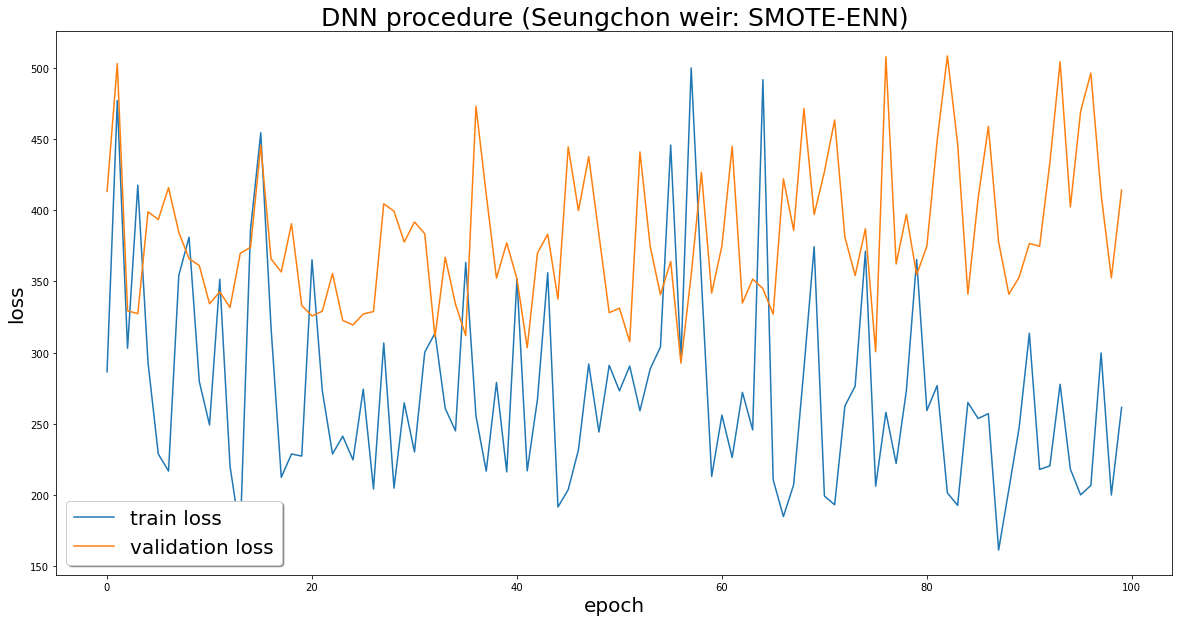

In [171]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Seungchon weir: SMOTE-ENN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN SC_SMOTE-ENN_python.png')

In [172]:
# SMOTE-Tomek
hist = model.fit(
    SC_train_x_smt, SC_train_y_smt,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
15/15 - 0s - loss: 628.1251 - mean_squared_error: 628.1251 - mean_absolute_error: 17.2562 - val_loss: 208.1469 - val_mean_squared_error: 208.1469 - val_mean_absolute_error: 8.6533 - 44ms/epoch - 3ms/step
Epoch 2/100
15/15 - 0s - loss: 629.2728 - mean_squared_error: 629.2728 - mean_absolute_error: 17.5267 - val_loss: 160.2812 - val_mean_squared_error: 160.2812 - val_mean_absolute_error: 7.5628 - 25ms/epoch - 2ms/step
Epoch 3/100
15/15 - 0s - loss: 698.7487 - mean_squared_error: 698.7487 - mean_absolute_error: 18.7448 - val_loss: 207.1945 - val_mean_squared_error: 207.1945 - val_mean_absolute_error: 8.9138 - 24ms/epoch - 2ms/step
Epoch 4/100
15/15 - 0s - loss: 737.0085 - mean_squared_error: 737.0085 - mean_absolute_error: 18.4135 - val_loss: 139.6270 - val_mean_squared_error: 139.6270 - val_mean_absolute_error: 7.1053 - 24ms/epoch - 2ms/step
Epoch 5/100
15/15 - 0s - loss: 675.8879 - mean_squared_error: 675.8879 - mean_absolute_error: 17.9225 - val_loss: 152.3961 - val_mean_sq

Epoch 39/100
15/15 - 0s - loss: 491.4022 - mean_squared_error: 491.4022 - mean_absolute_error: 16.2481 - val_loss: 114.6908 - val_mean_squared_error: 114.6908 - val_mean_absolute_error: 7.3024 - 26ms/epoch - 2ms/step
Epoch 40/100
15/15 - 0s - loss: 421.6521 - mean_squared_error: 421.6521 - mean_absolute_error: 15.1606 - val_loss: 169.8996 - val_mean_squared_error: 169.8996 - val_mean_absolute_error: 9.1265 - 23ms/epoch - 2ms/step
Epoch 41/100
15/15 - 0s - loss: 566.6890 - mean_squared_error: 566.6890 - mean_absolute_error: 16.9277 - val_loss: 121.0190 - val_mean_squared_error: 121.0190 - val_mean_absolute_error: 7.4720 - 24ms/epoch - 2ms/step
Epoch 42/100
15/15 - 0s - loss: 550.0712 - mean_squared_error: 550.0712 - mean_absolute_error: 16.7243 - val_loss: 103.9978 - val_mean_squared_error: 103.9978 - val_mean_absolute_error: 6.7886 - 24ms/epoch - 2ms/step
Epoch 43/100
15/15 - 0s - loss: 530.7393 - mean_squared_error: 530.7393 - mean_absolute_error: 15.9921 - val_loss: 116.5560 - val_me

Epoch 77/100
15/15 - 0s - loss: 495.3735 - mean_squared_error: 495.3735 - mean_absolute_error: 15.9048 - val_loss: 133.3807 - val_mean_squared_error: 133.3807 - val_mean_absolute_error: 7.5717 - 28ms/epoch - 2ms/step
Epoch 78/100
15/15 - 0s - loss: 470.3489 - mean_squared_error: 470.3489 - mean_absolute_error: 15.2722 - val_loss: 113.6121 - val_mean_squared_error: 113.6121 - val_mean_absolute_error: 7.1360 - 23ms/epoch - 2ms/step
Epoch 79/100
15/15 - 0s - loss: 492.0702 - mean_squared_error: 492.0702 - mean_absolute_error: 15.8420 - val_loss: 136.5194 - val_mean_squared_error: 136.5194 - val_mean_absolute_error: 7.8027 - 24ms/epoch - 2ms/step
Epoch 80/100
15/15 - 0s - loss: 578.0391 - mean_squared_error: 578.0391 - mean_absolute_error: 17.4943 - val_loss: 133.9969 - val_mean_squared_error: 133.9969 - val_mean_absolute_error: 7.7857 - 23ms/epoch - 2ms/step
Epoch 81/100
15/15 - 0s - loss: 624.7653 - mean_squared_error: 624.7653 - mean_absolute_error: 16.4768 - val_loss: 110.7665 - val_me

In [173]:
scores = model.evaluate(SC_test_x, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 3ms/step - loss: 454.2340 - mean_squared_error: 454.2340 - mean_absolute_error: 16.7932
test_loss:  454.2340087890625
test_mae:  454.2340087890625


In [174]:
SC_test_y_pred_DNN_smt = model.predict(SC_test_x)
SC_test_y_pred_DNN_smt

2/2 [==============================] - 0s 1ms/step


array([[ 54.349934 ],
       [ 63.319195 ],
       [ 64.47683  ],
       [ 63.907043 ],
       [ 78.10579  ],
       [ 65.43043  ],
       [ 69.104256 ],
       [ 70.18547  ],
       [ 39.299946 ],
       [ 62.5602   ],
       [ 63.97489  ],
       [ 78.25651  ],
       [ 30.905323 ],
       [ 73.27795  ],
       [ 53.030914 ],
       [ 16.893644 ],
       [ 90.99937  ],
       [ 58.7767   ],
       [ 46.96904  ],
       [ 18.414825 ],
       [ 21.306915 ],
       [  7.538703 ],
       [  1.8489008],
       [  2.8365965],
       [102.290276 ],
       [ 61.61035  ],
       [ 94.85514  ],
       [ 56.00704  ],
       [  7.3901334],
       [ 44.961212 ],
       [ 65.579185 ],
       [  6.2842355],
       [ 16.2704   ],
       [ 44.078857 ],
       [ 56.20368  ],
       [ 67.72226  ],
       [ 74.647835 ],
       [ 76.242455 ],
       [ 55.73513  ],
       [ 72.64807  ],
       [ 32.050465 ],
       [ 53.40325  ]], dtype=float32)

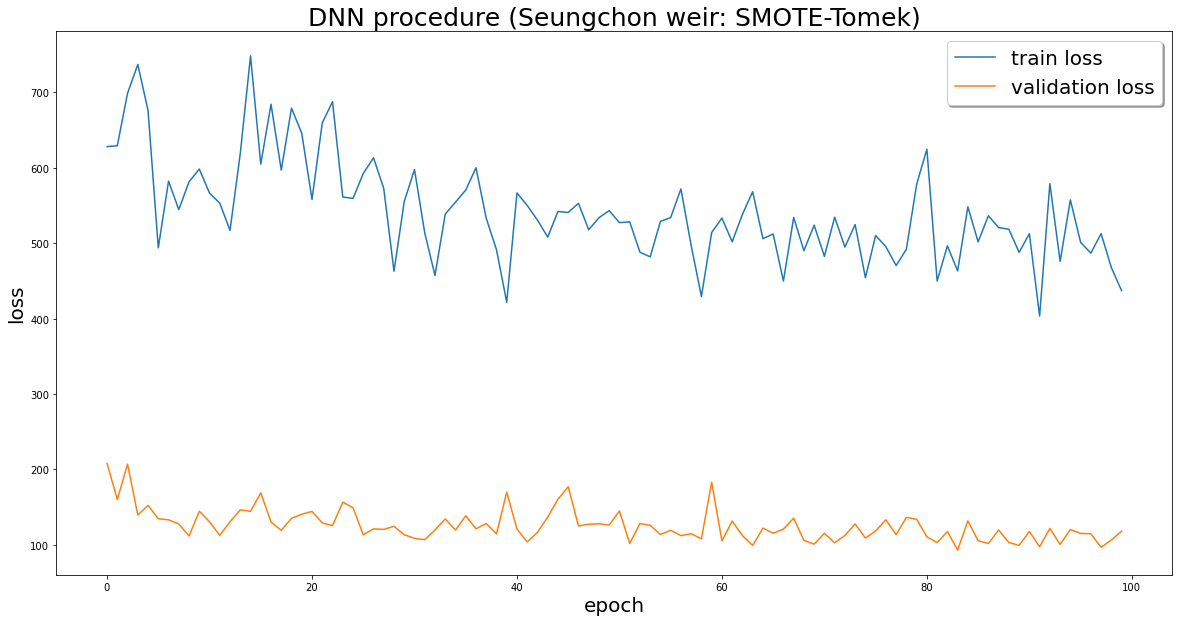

In [175]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Seungchon weir: SMOTE-Tomek)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN SC_SMOTE-Tomek_python.png')

In [191]:
SC_test_y = np.array(SC_test_y, dtype=np.float32)

In [192]:
### write data
import pandas as pd

df_SC = pd.DataFrame([SC_test_y, SC_test_y_pred_DNN, SC_test_y_pred_DNN_sm, SC_test_y_pred_DNN_sme, SC_test_y_pred_DNN_smt]).T
df_SC.columns = ['Chla', 'DNN', 'DNN_SMOTE', 'DNN_SMOTE_ENN', 'DNN_SMOTE_Tomek']
df_SC.to_csv('df_SC_DNN_res.csv', index=False, encoding='cp949') 

In [193]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

In [194]:
# CNN model (SC)
SC_train_x_CNN = SC_train_x.to_numpy().reshape(SC_train_x.shape[0], SC_train_x.shape[1], 1)
SC_train_x_sm_CNN = SC_train_x_sm.to_numpy().reshape(SC_train_x_sm.shape[0], SC_train_x_sm.shape[1], 1) # SMOTE
SC_train_x_sme_CNN = SC_train_x_sme.to_numpy().reshape(SC_train_x_sme.shape[0], SC_train_x_sme.shape[1], 1) # SMOTE-ENN
SC_train_x_smt_CNN = SC_train_x_smt.to_numpy().reshape(SC_train_x_smt.shape[0], SC_train_x_smt.shape[1], 1) # SMOTE-Tomek
SC_test_x_CNN = SC_test_x.to_numpy().reshape(SC_test_x.shape[0], SC_test_x.shape[1], 1) 

In [195]:
# model
model = tf.keras.Sequential()  
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(18, 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함.

In [198]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 17, 64)            192       
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            6176      
                                                                 
 max_pooling1d (MaxPooling1  (None, 7, 32)             0         
 D)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 7, 32)             0         
                                                                 
 flatten (Flatten)           (None, 224)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                7200      
                                                      

In [196]:
# original
hist = model.fit(
    SC_train_x_CNN, SC_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
9/9 - 0s - loss: 3900.9749 - mean_squared_error: 3900.9749 - mean_absolute_error: 46.5329 - val_loss: 1386.1454 - val_mean_squared_error: 1386.1454 - val_mean_absolute_error: 27.3540 - 470ms/epoch - 52ms/step
Epoch 2/100
9/9 - 0s - loss: 1968.8160 - mean_squared_error: 1968.8160 - mean_absolute_error: 33.3318 - val_loss: 1391.3528 - val_mean_squared_error: 1391.3528 - val_mean_absolute_error: 28.5749 - 32ms/epoch - 4ms/step
Epoch 3/100
9/9 - 0s - loss: 1726.7434 - mean_squared_error: 1726.7434 - mean_absolute_error: 29.9676 - val_loss: 1406.1277 - val_mean_squared_error: 1406.1277 - val_mean_absolute_error: 27.6000 - 28ms/epoch - 3ms/step
Epoch 4/100
9/9 - 0s - loss: 1709.7798 - mean_squared_error: 1709.7798 - mean_absolute_error: 28.5506 - val_loss: 1383.0455 - val_mean_squared_error: 1383.0455 - val_mean_absolute_error: 27.3135 - 28ms/epoch - 3ms/step
Epoch 5/100
9/9 - 0s - loss: 1679.5564 - mean_squared_error: 1679.5564 - mean_absolute_error: 28.9862 - val_loss: 1310.002

Epoch 39/100
9/9 - 0s - loss: 1134.5803 - mean_squared_error: 1134.5803 - mean_absolute_error: 24.5035 - val_loss: 922.4875 - val_mean_squared_error: 922.4875 - val_mean_absolute_error: 23.5955 - 26ms/epoch - 3ms/step
Epoch 40/100
9/9 - 0s - loss: 1128.4500 - mean_squared_error: 1128.4500 - mean_absolute_error: 23.4028 - val_loss: 919.6329 - val_mean_squared_error: 919.6329 - val_mean_absolute_error: 24.0365 - 27ms/epoch - 3ms/step
Epoch 41/100
9/9 - 0s - loss: 1092.4548 - mean_squared_error: 1092.4548 - mean_absolute_error: 23.8526 - val_loss: 893.7687 - val_mean_squared_error: 893.7687 - val_mean_absolute_error: 23.5948 - 28ms/epoch - 3ms/step
Epoch 42/100
9/9 - 0s - loss: 1086.7327 - mean_squared_error: 1086.7327 - mean_absolute_error: 23.5062 - val_loss: 869.5478 - val_mean_squared_error: 869.5478 - val_mean_absolute_error: 23.0677 - 28ms/epoch - 3ms/step
Epoch 43/100
9/9 - 0s - loss: 1175.9884 - mean_squared_error: 1175.9884 - mean_absolute_error: 24.5982 - val_loss: 869.8898 - va

Epoch 77/100
9/9 - 0s - loss: 820.7632 - mean_squared_error: 820.7632 - mean_absolute_error: 20.4995 - val_loss: 766.2374 - val_mean_squared_error: 766.2374 - val_mean_absolute_error: 21.3870 - 28ms/epoch - 3ms/step
Epoch 78/100
9/9 - 0s - loss: 754.0986 - mean_squared_error: 754.0986 - mean_absolute_error: 20.5659 - val_loss: 774.4945 - val_mean_squared_error: 774.4945 - val_mean_absolute_error: 21.0452 - 27ms/epoch - 3ms/step
Epoch 79/100
9/9 - 0s - loss: 914.4689 - mean_squared_error: 914.4689 - mean_absolute_error: 21.2978 - val_loss: 760.1703 - val_mean_squared_error: 760.1703 - val_mean_absolute_error: 21.1558 - 27ms/epoch - 3ms/step
Epoch 80/100
9/9 - 0s - loss: 789.9107 - mean_squared_error: 789.9107 - mean_absolute_error: 19.8255 - val_loss: 760.6089 - val_mean_squared_error: 760.6089 - val_mean_absolute_error: 20.8722 - 28ms/epoch - 3ms/step
Epoch 81/100
9/9 - 0s - loss: 860.1852 - mean_squared_error: 860.1852 - mean_absolute_error: 20.7889 - val_loss: 802.5084 - val_mean_squ

In [197]:
scores = model.evaluate(SC_test_x_CNN, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 3ms/step - loss: 267.9146 - mean_squared_error: 282.3494 - mean_absolute_error: 13.1127
test_loss:  267.9145812988281
test_mae:  282.3493957519531


In [199]:
SC_test_y_pred_CNN = model.predict(SC_test_x_CNN)
SC_test_y_pred_CNN

2/2 [==============================] - 0s 999us/step


array([[40.346577 ],
       [78.00745  ],
       [41.114273 ],
       [41.894257 ],
       [75.94632  ],
       [48.8482   ],
       [47.700977 ],
       [49.746826 ],
       [30.362246 ],
       [51.290318 ],
       [43.96513  ],
       [68.70222  ],
       [21.302547 ],
       [80.3435   ],
       [45.004032 ],
       [10.3866005],
       [75.88236  ],
       [58.22974  ],
       [55.481762 ],
       [12.158719 ],
       [13.574528 ],
       [ 8.85772  ],
       [-2.1063845],
       [ 3.5583375],
       [75.18673  ],
       [24.816921 ],
       [54.56787  ],
       [41.05395  ],
       [14.531562 ],
       [20.96971  ],
       [60.508938 ],
       [ 5.328411 ],
       [11.248894 ],
       [20.690369 ],
       [58.490578 ],
       [74.28973  ],
       [79.36658  ],
       [78.19213  ],
       [25.255154 ],
       [57.103058 ],
       [14.598775 ],
       [38.192204 ]], dtype=float32)

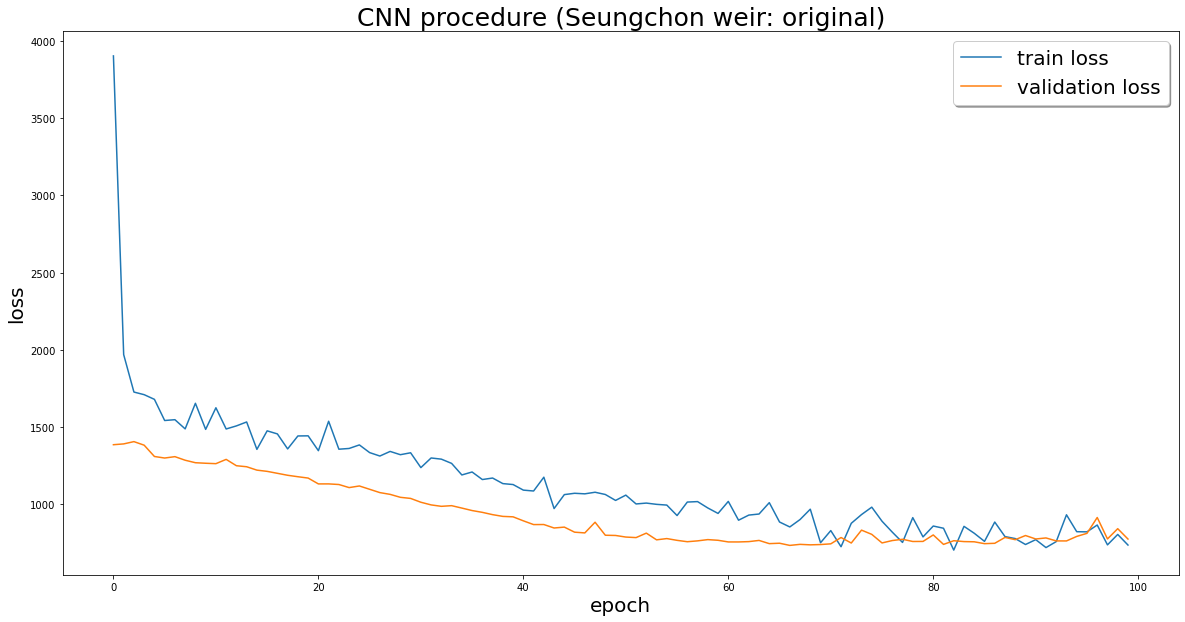

In [200]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Seungchon weir: original)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN SC_python.png')

In [201]:
# SMOTE
hist = model.fit(
    SC_train_x_sm_CNN, SC_train_y_sm,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
17/17 - 0s - loss: 619.5557 - mean_squared_error: 619.5557 - mean_absolute_error: 18.3335 - val_loss: 178.8025 - val_mean_squared_error: 178.8025 - val_mean_absolute_error: 8.6889 - 56ms/epoch - 3ms/step
Epoch 2/100
17/17 - 0s - loss: 637.2727 - mean_squared_error: 637.2727 - mean_absolute_error: 18.3427 - val_loss: 161.6253 - val_mean_squared_error: 161.6253 - val_mean_absolute_error: 8.9234 - 40ms/epoch - 2ms/step
Epoch 3/100
17/17 - 0s - loss: 672.9332 - mean_squared_error: 672.9332 - mean_absolute_error: 18.5550 - val_loss: 145.5298 - val_mean_squared_error: 145.5298 - val_mean_absolute_error: 8.4027 - 37ms/epoch - 2ms/step
Epoch 4/100
17/17 - 0s - loss: 642.4445 - mean_squared_error: 642.4445 - mean_absolute_error: 18.4923 - val_loss: 166.0967 - val_mean_squared_error: 166.0967 - val_mean_absolute_error: 8.7064 - 37ms/epoch - 2ms/step
Epoch 5/100
17/17 - 0s - loss: 636.1477 - mean_squared_error: 636.1477 - mean_absolute_error: 18.5907 - val_loss: 139.8923 - val_mean_sq

Epoch 39/100
17/17 - 0s - loss: 555.2731 - mean_squared_error: 555.2731 - mean_absolute_error: 17.3416 - val_loss: 117.1035 - val_mean_squared_error: 117.1035 - val_mean_absolute_error: 7.2101 - 36ms/epoch - 2ms/step
Epoch 40/100
17/17 - 0s - loss: 627.6904 - mean_squared_error: 627.6904 - mean_absolute_error: 18.4304 - val_loss: 117.1252 - val_mean_squared_error: 117.1252 - val_mean_absolute_error: 7.3968 - 35ms/epoch - 2ms/step
Epoch 41/100
17/17 - 0s - loss: 653.6450 - mean_squared_error: 653.6450 - mean_absolute_error: 19.1228 - val_loss: 187.6967 - val_mean_squared_error: 187.6967 - val_mean_absolute_error: 9.9014 - 36ms/epoch - 2ms/step
Epoch 42/100
17/17 - 0s - loss: 719.7219 - mean_squared_error: 719.7219 - mean_absolute_error: 19.0083 - val_loss: 121.8500 - val_mean_squared_error: 121.8500 - val_mean_absolute_error: 7.6459 - 37ms/epoch - 2ms/step
Epoch 43/100
17/17 - 0s - loss: 659.6260 - mean_squared_error: 659.6260 - mean_absolute_error: 18.7817 - val_loss: 124.0506 - val_me

Epoch 77/100
17/17 - 0s - loss: 574.3640 - mean_squared_error: 574.3640 - mean_absolute_error: 17.7367 - val_loss: 109.8293 - val_mean_squared_error: 109.8293 - val_mean_absolute_error: 7.3030 - 39ms/epoch - 2ms/step
Epoch 78/100
17/17 - 0s - loss: 549.6599 - mean_squared_error: 549.6599 - mean_absolute_error: 16.7073 - val_loss: 117.7806 - val_mean_squared_error: 117.7806 - val_mean_absolute_error: 7.3600 - 40ms/epoch - 2ms/step
Epoch 79/100
17/17 - 0s - loss: 588.8290 - mean_squared_error: 588.8290 - mean_absolute_error: 17.7312 - val_loss: 123.9694 - val_mean_squared_error: 123.9694 - val_mean_absolute_error: 7.9092 - 37ms/epoch - 2ms/step
Epoch 80/100
17/17 - 0s - loss: 615.1917 - mean_squared_error: 615.1917 - mean_absolute_error: 17.7180 - val_loss: 132.1682 - val_mean_squared_error: 132.1682 - val_mean_absolute_error: 7.4884 - 37ms/epoch - 2ms/step
Epoch 81/100
17/17 - 0s - loss: 569.5309 - mean_squared_error: 569.5309 - mean_absolute_error: 17.4421 - val_loss: 139.6920 - val_me

In [202]:
scores = model.evaluate(SC_test_x_CNN, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 626.2408 - mean_squared_error: 706.0059 - mean_absolute_error: 21.6594
test_loss:  626.2407836914062
test_mae:  706.0059204101562


In [203]:
SC_test_y_pred_CNN_sm = model.predict(SC_test_x_CNN)
SC_test_y_pred_CNN_sm

2/2 [==============================] - 0s 1000us/step


array([[53.814697 ],
       [95.25544  ],
       [61.63577  ],
       [60.832466 ],
       [95.625984 ],
       [68.160934 ],
       [69.92312  ],
       [70.96093  ],
       [44.158154 ],
       [72.2264   ],
       [62.14389  ],
       [89.74459  ],
       [37.499714 ],
       [97.04237  ],
       [56.458557 ],
       [14.411409 ],
       [91.74249  ],
       [67.72991  ],
       [58.893135 ],
       [39.069405 ],
       [19.690413 ],
       [13.6352215],
       [-3.2546186],
       [ 5.538842 ],
       [98.42035  ],
       [42.425632 ],
       [70.24272  ],
       [51.289402 ],
       [23.144228 ],
       [36.154766 ],
       [68.83819  ],
       [ 7.2742567],
       [16.142614 ],
       [34.119858 ],
       [67.15566  ],
       [92.74988  ],
       [98.16409  ],
       [88.77445  ],
       [47.083405 ],
       [74.38036  ],
       [23.83146  ],
       [53.95289  ]], dtype=float32)

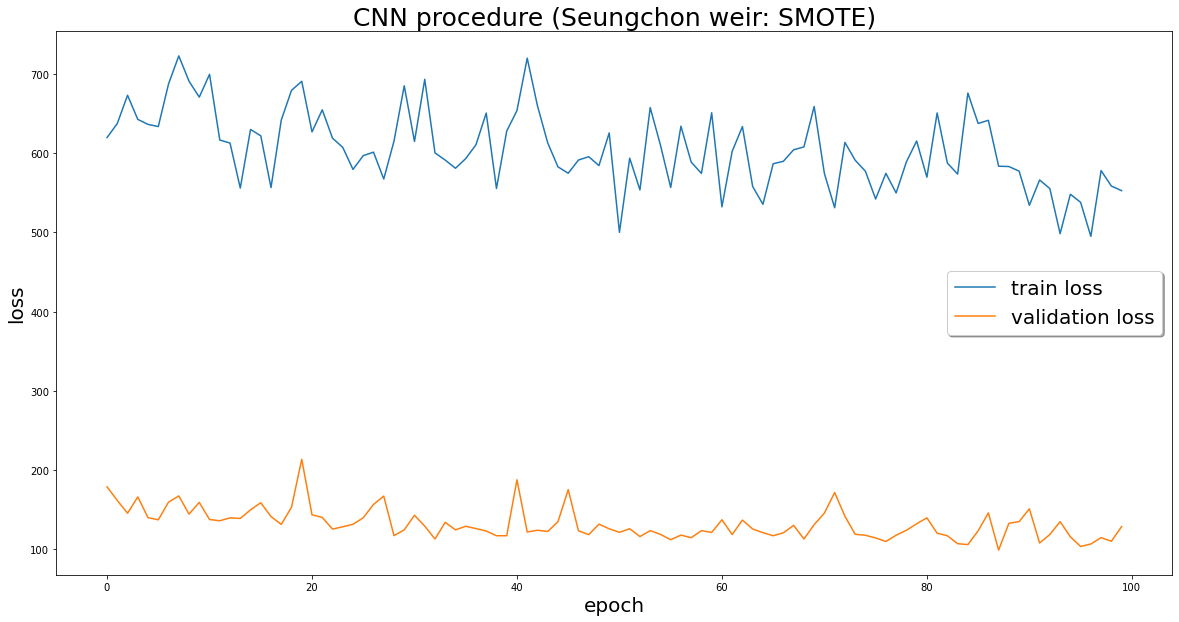

In [204]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Seungchon weir: SMOTE)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN SC_SMOTE_python.png')

In [205]:
# SMOTE-ENN
hist = model.fit(
    SC_train_x_sme_CNN, SC_train_y_sme,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
6/6 - 0s - loss: 229.6266 - mean_squared_error: 229.6266 - mean_absolute_error: 10.8882 - val_loss: 636.4797 - val_mean_squared_error: 636.4797 - val_mean_absolute_error: 17.9329 - 43ms/epoch - 7ms/step
Epoch 2/100
6/6 - 0s - loss: 288.5819 - mean_squared_error: 288.5819 - mean_absolute_error: 12.1639 - val_loss: 752.3676 - val_mean_squared_error: 752.3676 - val_mean_absolute_error: 19.1578 - 23ms/epoch - 4ms/step
Epoch 3/100
6/6 - 0s - loss: 258.3331 - mean_squared_error: 258.3331 - mean_absolute_error: 11.7985 - val_loss: 556.9056 - val_mean_squared_error: 556.9056 - val_mean_absolute_error: 16.6834 - 24ms/epoch - 4ms/step
Epoch 4/100
6/6 - 0s - loss: 250.0962 - mean_squared_error: 250.0962 - mean_absolute_error: 11.8538 - val_loss: 488.0200 - val_mean_squared_error: 488.0200 - val_mean_absolute_error: 15.6395 - 22ms/epoch - 4ms/step
Epoch 5/100
6/6 - 0s - loss: 265.4667 - mean_squared_error: 265.4667 - mean_absolute_error: 11.1891 - val_loss: 561.4213 - val_mean_squared_

6/6 - 0s - loss: 166.5639 - mean_squared_error: 166.5639 - mean_absolute_error: 9.6108 - val_loss: 522.1285 - val_mean_squared_error: 522.1285 - val_mean_absolute_error: 14.6867 - 24ms/epoch - 4ms/step
Epoch 40/100
6/6 - 0s - loss: 249.5403 - mean_squared_error: 249.5403 - mean_absolute_error: 10.4888 - val_loss: 560.5360 - val_mean_squared_error: 560.5360 - val_mean_absolute_error: 15.2299 - 24ms/epoch - 4ms/step
Epoch 41/100
6/6 - 0s - loss: 237.5150 - mean_squared_error: 237.5150 - mean_absolute_error: 10.5608 - val_loss: 510.2168 - val_mean_squared_error: 510.2168 - val_mean_absolute_error: 14.7786 - 23ms/epoch - 4ms/step
Epoch 42/100
6/6 - 0s - loss: 200.8770 - mean_squared_error: 200.8770 - mean_absolute_error: 9.4395 - val_loss: 477.8905 - val_mean_squared_error: 477.8905 - val_mean_absolute_error: 14.3450 - 24ms/epoch - 4ms/step
Epoch 43/100
6/6 - 0s - loss: 224.3671 - mean_squared_error: 224.3671 - mean_absolute_error: 10.7644 - val_loss: 519.0966 - val_mean_squared_error: 519

Epoch 78/100
6/6 - 0s - loss: 182.1854 - mean_squared_error: 182.1854 - mean_absolute_error: 9.3523 - val_loss: 536.0756 - val_mean_squared_error: 536.0756 - val_mean_absolute_error: 14.3744 - 23ms/epoch - 4ms/step
Epoch 79/100
6/6 - 0s - loss: 163.6465 - mean_squared_error: 163.6465 - mean_absolute_error: 9.1899 - val_loss: 522.5169 - val_mean_squared_error: 522.5169 - val_mean_absolute_error: 14.2166 - 24ms/epoch - 4ms/step
Epoch 80/100
6/6 - 0s - loss: 185.9511 - mean_squared_error: 185.9511 - mean_absolute_error: 9.4908 - val_loss: 464.8110 - val_mean_squared_error: 464.8110 - val_mean_absolute_error: 13.4859 - 24ms/epoch - 4ms/step
Epoch 81/100
6/6 - 0s - loss: 207.1415 - mean_squared_error: 207.1415 - mean_absolute_error: 9.8350 - val_loss: 458.6096 - val_mean_squared_error: 458.6096 - val_mean_absolute_error: 13.3760 - 23ms/epoch - 4ms/step
Epoch 82/100
6/6 - 0s - loss: 168.4933 - mean_squared_error: 168.4933 - mean_absolute_error: 9.3283 - val_loss: 682.3697 - val_mean_squared_

In [206]:
scores = model.evaluate(SC_test_x_CNN, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 337.0681 - mean_squared_error: 340.4885 - mean_absolute_error: 14.6572
test_loss:  337.0680847167969
test_mae:  340.48846435546875


In [207]:
SC_test_y_pred_CNN_sme = model.predict(SC_test_x_CNN)
SC_test_y_pred_CNN_sme

2/2 [==============================] - 0s 1000us/step


array([[46.631786 ],
       [82.54196  ],
       [61.536667 ],
       [59.71851  ],
       [95.00254  ],
       [65.66174  ],
       [65.09086  ],
       [62.65034  ],
       [35.79706  ],
       [58.58792  ],
       [55.971172 ],
       [74.53803  ],
       [39.320522 ],
       [80.85785  ],
       [46.61832  ],
       [ 5.4631557],
       [74.39786  ],
       [55.824623 ],
       [49.71964  ],
       [ 4.585802 ],
       [19.291039 ],
       [ 7.784237 ],
       [-2.5625684],
       [ 3.2976832],
       [87.18702  ],
       [34.885212 ],
       [61.37789  ],
       [42.895275 ],
       [ 5.056891 ],
       [34.08147  ],
       [58.90617  ],
       [ 3.1569426],
       [12.378039 ],
       [27.083532 ],
       [55.981533 ],
       [77.31441  ],
       [80.164566 ],
       [73.118805 ],
       [29.86862  ],
       [60.120758 ],
       [14.298413 ],
       [41.885586 ]], dtype=float32)

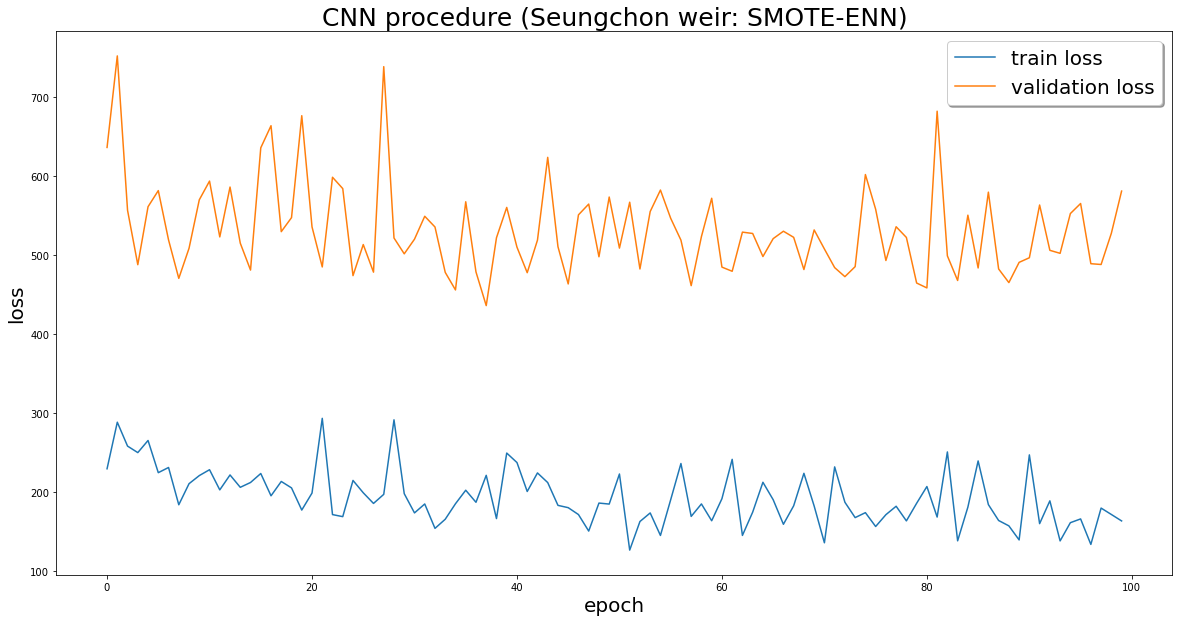

In [208]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Seungchon weir: SMOTE-ENN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN SC_SMOTE_ENN_python.png')

In [209]:
# SMOTE-Tomek
hist = model.fit(
    SC_train_x_smt_CNN, SC_train_y_smt,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
15/15 - 0s - loss: 545.0885 - mean_squared_error: 545.0885 - mean_absolute_error: 16.9809 - val_loss: 129.0746 - val_mean_squared_error: 129.0746 - val_mean_absolute_error: 7.2205 - 53ms/epoch - 4ms/step
Epoch 2/100
15/15 - 0s - loss: 616.8190 - mean_squared_error: 616.8190 - mean_absolute_error: 17.2921 - val_loss: 121.2712 - val_mean_squared_error: 121.2712 - val_mean_absolute_error: 7.0025 - 35ms/epoch - 2ms/step
Epoch 3/100
15/15 - 0s - loss: 486.0467 - mean_squared_error: 486.0467 - mean_absolute_error: 16.0529 - val_loss: 116.0082 - val_mean_squared_error: 116.0082 - val_mean_absolute_error: 6.4029 - 35ms/epoch - 2ms/step
Epoch 4/100
15/15 - 0s - loss: 521.2501 - mean_squared_error: 521.2501 - mean_absolute_error: 16.5869 - val_loss: 100.3969 - val_mean_squared_error: 100.3969 - val_mean_absolute_error: 5.7759 - 34ms/epoch - 2ms/step
Epoch 5/100
15/15 - 0s - loss: 545.2105 - mean_squared_error: 545.2105 - mean_absolute_error: 16.8243 - val_loss: 109.8590 - val_mean_sq

Epoch 39/100
15/15 - 0s - loss: 505.1357 - mean_squared_error: 505.1357 - mean_absolute_error: 16.6595 - val_loss: 109.5937 - val_mean_squared_error: 109.5937 - val_mean_absolute_error: 6.1752 - 34ms/epoch - 2ms/step
Epoch 40/100
15/15 - 0s - loss: 515.8527 - mean_squared_error: 515.8527 - mean_absolute_error: 16.6519 - val_loss: 106.1484 - val_mean_squared_error: 106.1484 - val_mean_absolute_error: 6.1586 - 35ms/epoch - 2ms/step
Epoch 41/100
15/15 - 0s - loss: 498.3349 - mean_squared_error: 498.3349 - mean_absolute_error: 15.6690 - val_loss: 142.6875 - val_mean_squared_error: 142.6875 - val_mean_absolute_error: 7.4672 - 34ms/epoch - 2ms/step
Epoch 42/100
15/15 - 0s - loss: 536.8242 - mean_squared_error: 536.8242 - mean_absolute_error: 16.8782 - val_loss: 169.5171 - val_mean_squared_error: 169.5171 - val_mean_absolute_error: 8.1426 - 35ms/epoch - 2ms/step
Epoch 43/100
15/15 - 0s - loss: 486.3492 - mean_squared_error: 486.3492 - mean_absolute_error: 16.5927 - val_loss: 124.4859 - val_me

Epoch 77/100
15/15 - 0s - loss: 456.7352 - mean_squared_error: 456.7352 - mean_absolute_error: 15.6962 - val_loss: 130.9893 - val_mean_squared_error: 130.9893 - val_mean_absolute_error: 6.9166 - 35ms/epoch - 2ms/step
Epoch 78/100
15/15 - 0s - loss: 478.0861 - mean_squared_error: 478.0861 - mean_absolute_error: 15.7380 - val_loss: 117.4513 - val_mean_squared_error: 117.4513 - val_mean_absolute_error: 7.0361 - 33ms/epoch - 2ms/step
Epoch 79/100
15/15 - 0s - loss: 465.1671 - mean_squared_error: 465.1671 - mean_absolute_error: 15.8801 - val_loss: 124.5941 - val_mean_squared_error: 124.5941 - val_mean_absolute_error: 7.3657 - 34ms/epoch - 2ms/step
Epoch 80/100
15/15 - 0s - loss: 468.4131 - mean_squared_error: 468.4131 - mean_absolute_error: 15.8938 - val_loss: 119.4113 - val_mean_squared_error: 119.4113 - val_mean_absolute_error: 6.8355 - 33ms/epoch - 2ms/step
Epoch 81/100
15/15 - 0s - loss: 488.3183 - mean_squared_error: 488.3183 - mean_absolute_error: 15.8269 - val_loss: 112.6889 - val_me

In [210]:
scores = model.evaluate(SC_test_x_CNN, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 228.7212 - mean_squared_error: 256.1871 - mean_absolute_error: 12.5591
test_loss:  228.72122192382812
test_mae:  256.1871337890625


In [211]:
SC_test_y_pred_CNN_smt = model.predict(SC_test_x_CNN)
SC_test_y_pred_CNN_smt

2/2 [==============================] - 0s 2ms/step


array([[44.096203 ],
       [73.24228  ],
       [48.861347 ],
       [51.108784 ],
       [76.074326 ],
       [58.41229  ],
       [57.28857  ],
       [57.97013  ],
       [36.566605 ],
       [55.234486 ],
       [50.96517  ],
       [69.02116  ],
       [27.911213 ],
       [71.2863   ],
       [42.742783 ],
       [ 8.855858 ],
       [72.92672  ],
       [53.377354 ],
       [41.963394 ],
       [41.48244  ],
       [ 9.604562 ],
       [ 5.7119875],
       [ 0.9645697],
       [ 4.7089477],
       [77.450134 ],
       [36.584526 ],
       [56.793007 ],
       [35.48005  ],
       [12.052219 ],
       [24.073467 ],
       [49.84034  ],
       [ 3.3833637],
       [ 6.130841 ],
       [23.328306 ],
       [51.341003 ],
       [67.34411  ],
       [74.04167  ],
       [68.629524 ],
       [40.76965  ],
       [62.394424 ],
       [21.108839 ],
       [44.461285 ]], dtype=float32)

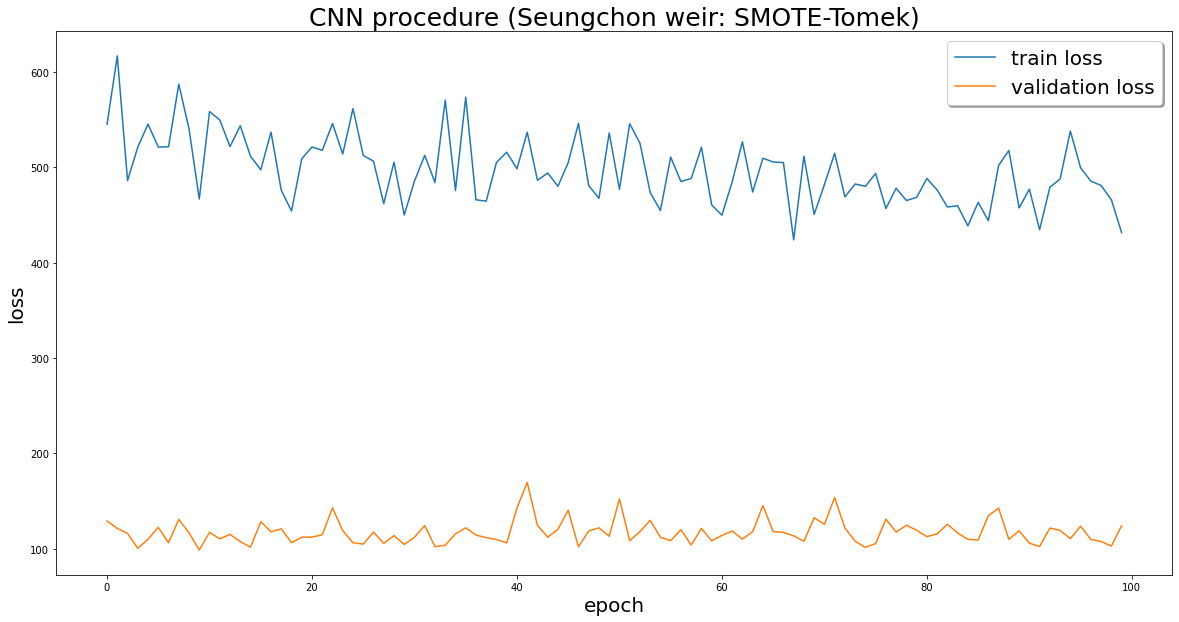

In [212]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Seungchon weir: SMOTE-Tomek)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN SC_SMOTE_Tomek_python.png')

In [213]:
SC_test_y = np.array(SC_test_y, dtype=np.float32)

In [214]:
### write data
import pandas as pd

df_SC = pd.DataFrame([SC_test_y, SC_test_y_pred_DNN, SC_test_y_pred_DNN_sm, SC_test_y_pred_DNN_sme, SC_test_y_pred_DNN_smt,
                      SC_test_y_pred_CNN, SC_test_y_pred_CNN_sm, SC_test_y_pred_CNN_sme, SC_test_y_pred_CNN_smt]).T
df_SC.columns = ['Chla', 'DNN', 'DNN_SMOTE', 'DNN_SMOTE_ENN', 'DNN_SMOTE_Tomek',
                 'CNN', 'CNN_SMOTE', 'CNN_SMOTE_ENN', 'CNN_SMOTE_Tomek']
df_SC.to_csv('df_SC_res.csv', index=False, encoding='cp949') 